In [ ]:
!pip install top2vec[all]

In [3]:
import top2vec
print(top2vec.__version__)

1.0.36


In [ ]:
pip install --upgrade top2vec

In [1]:
# ================================================================
# DAFTAR IMPORT UNTUK PROYEK TOP2VEC
# ================================================================

# Library Inti untuk Pemodelan Topik
from top2vec import Top2Vec

# Library untuk Manipulasi Data
import pandas as pd

# Library untuk Visualisasi Hasil
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Sangat direkomendasikan untuk visualisasi topik

# Utilitas Sistem (opsional, tapi sering berguna)
import os

# NumPy adalah dependensi inti dan baik untuk disertakan
import numpy as np


# --- CONTOH PENGGUNAAN AWAL ---

# Memuat data Anda
# df = pd.read_excel('path/to/your/file.xlsx')
# docs = df['text_column'].tolist()

# Melatih model Top2Vec
# model = Top2Vec(documents=docs, embedding_model='indobenchmark/indobert-base-p1')

# Siap untuk analisis lebih lanjut!

2025-06-21 13:11:50.972578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750511510.996562     162 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750511511.004313     162 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2025-06-21 13:19:02,640 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-06-21 13:19:02,820 - top2vec - INFO - Downloading universal-sentence-encoder model


Melatih model Top2Vec...
Menggunakan model embedding: universal-sentence-encoder


2025-06-21 13:19:11,610 - top2vec - INFO - Creating joint document/word embedding
2025-06-21 13:19:13,911 - top2vec - INFO - Creating lower dimension embedding of documents
2025-06-21 13:19:27,765 - top2vec - INFO - Finding dense areas of documents
2025-06-21 13:19:28,064 - top2vec - INFO - Finding topics


Model Top2Vec berhasil dilatih.

Menemukan 95 topik.

Informasi Topik:
    Topic  Count                            Name
0       0    522       jelek_muncul_tulis_bilang
1       1    509         masuk_tolong_pake_harga
2       2    453               good_nice_ok_best
3       3    406         tolong_masuk_pake_harga
4       4    387                 ok_good_ya_nice
..    ...    ...                             ...
90     90     22  install_error_instal_uninstall
91     91     21                pas_not_ni_error
92     92     20     aplikasi_cepat_daftar_buruk
93     93     20        bilang_jelek_mudah_hemat
94     94     17               good_nice_ok_best

[95 rows x 3 columns]
Menghasilkan 7 Word Cloud teratas...
Word Cloud untuk Topik 0 disimpan di: wordclouds_output_top2vec/wordcloud_topic_0_jelek_muncul_tulis_bilang.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'wordcloud_topic_0_jelek_muncul_tulis_bilang.png' siap diunduh.


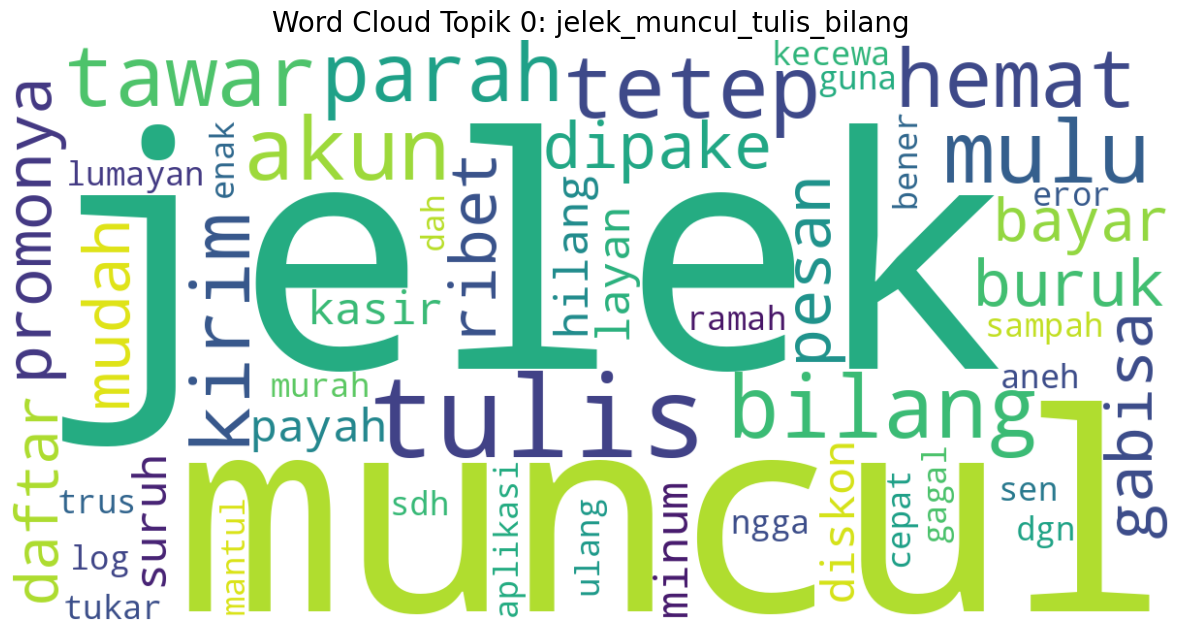

Word Cloud untuk Topik 1 disimpan di: wordclouds_output_top2vec/wordcloud_topic_1_masuk_tolong_pake_harga.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'wordcloud_topic_1_masuk_tolong_pake_harga.png' siap diunduh.


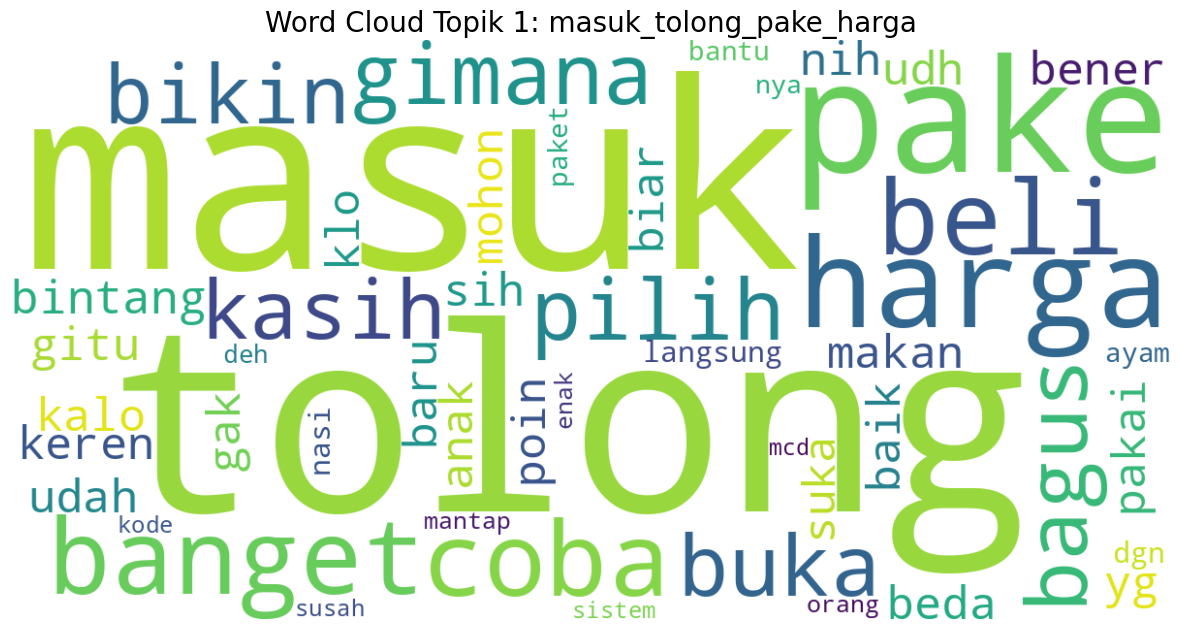

Word Cloud untuk Topik 2 disimpan di: wordclouds_output_top2vec/wordcloud_topic_2_good_nice_ok_best.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'wordcloud_topic_2_good_nice_ok_best.png' siap diunduh.


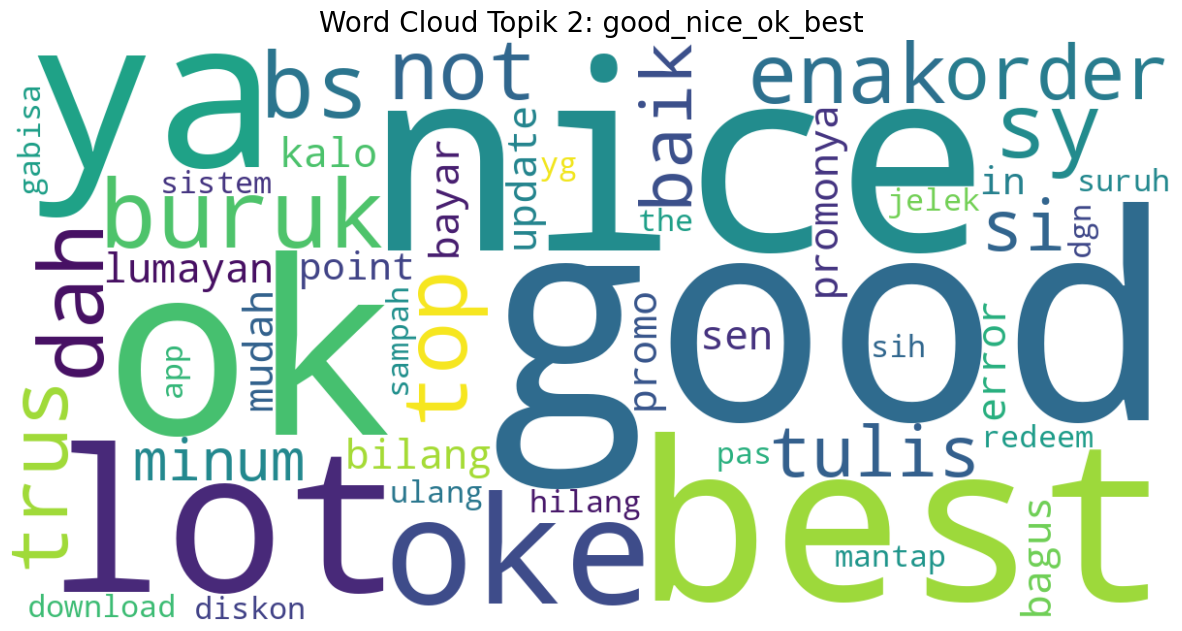

Word Cloud untuk Topik 3 disimpan di: wordclouds_output_top2vec/wordcloud_topic_3_tolong_masuk_pake_harga.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'wordcloud_topic_3_tolong_masuk_pake_harga.png' siap diunduh.


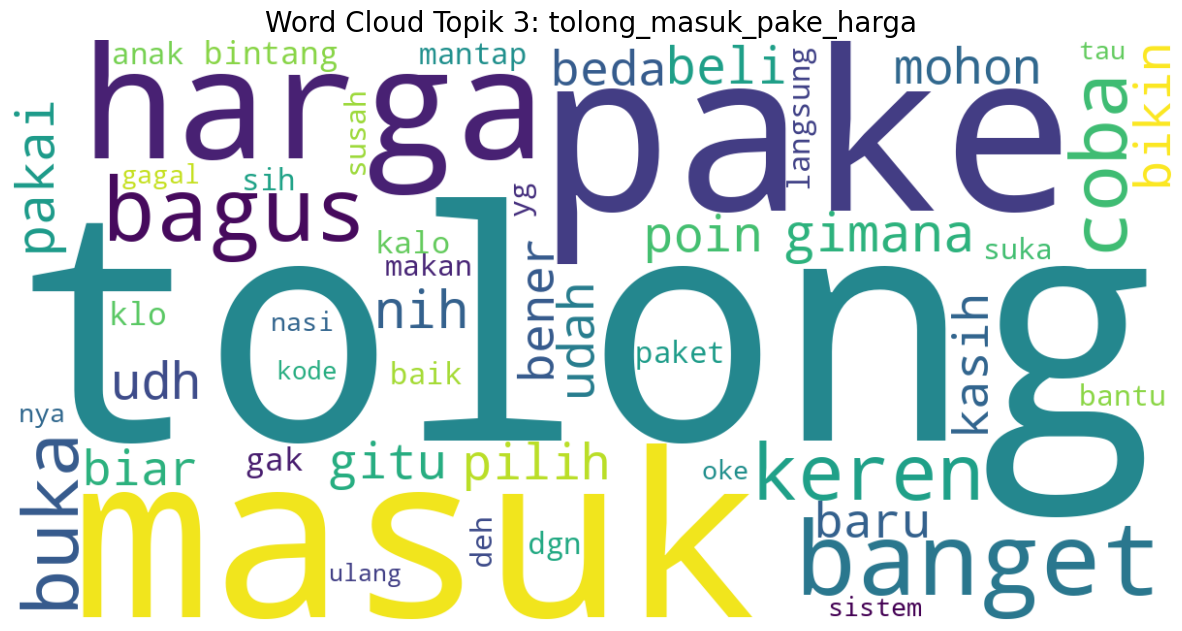

Word Cloud untuk Topik 4 disimpan di: wordclouds_output_top2vec/wordcloud_topic_4_ok_good_ya_nice.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'wordcloud_topic_4_ok_good_ya_nice.png' siap diunduh.


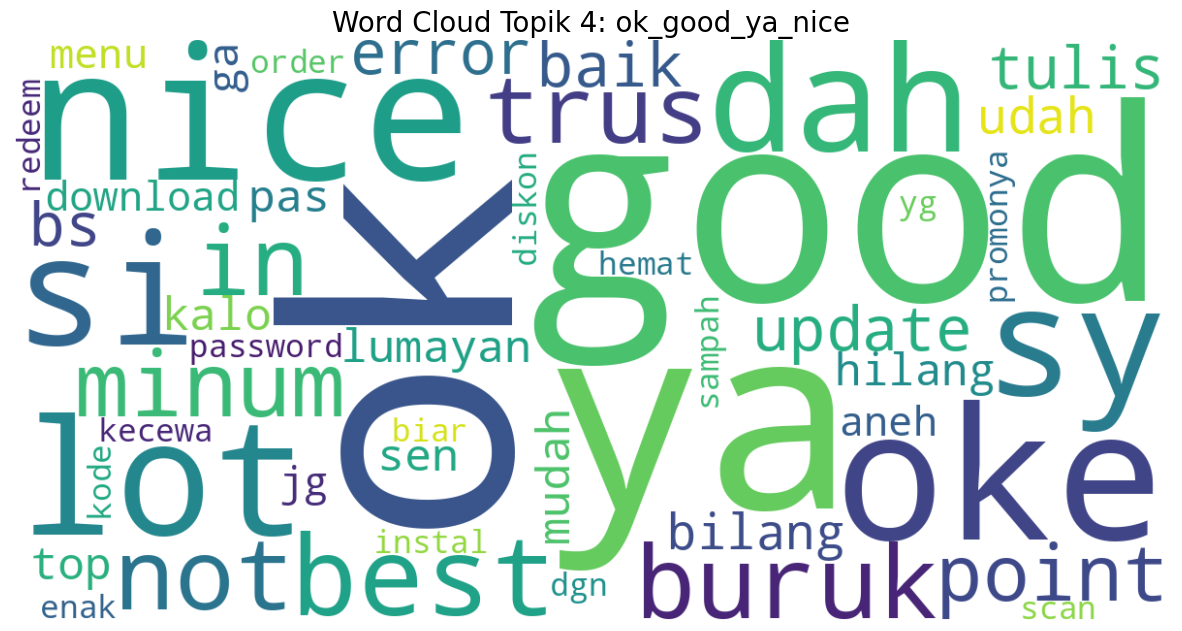

Word Cloud untuk Topik 5 disimpan di: wordclouds_output_top2vec/wordcloud_topic_5_not_ya_in_pas.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'wordcloud_topic_5_not_ya_in_pas.png' siap diunduh.


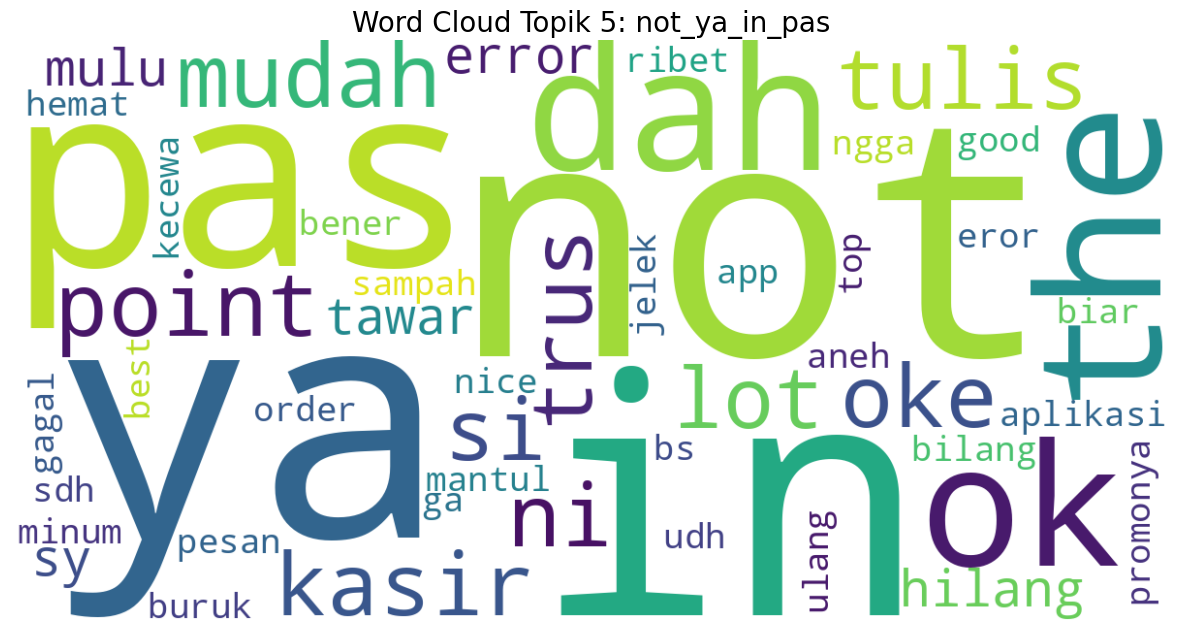

Word Cloud untuk Topik 6 disimpan di: wordclouds_output_top2vec/wordcloud_topic_6_bagus_banget_beda_harga.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'wordcloud_topic_6_bagus_banget_beda_harga.png' siap diunduh.


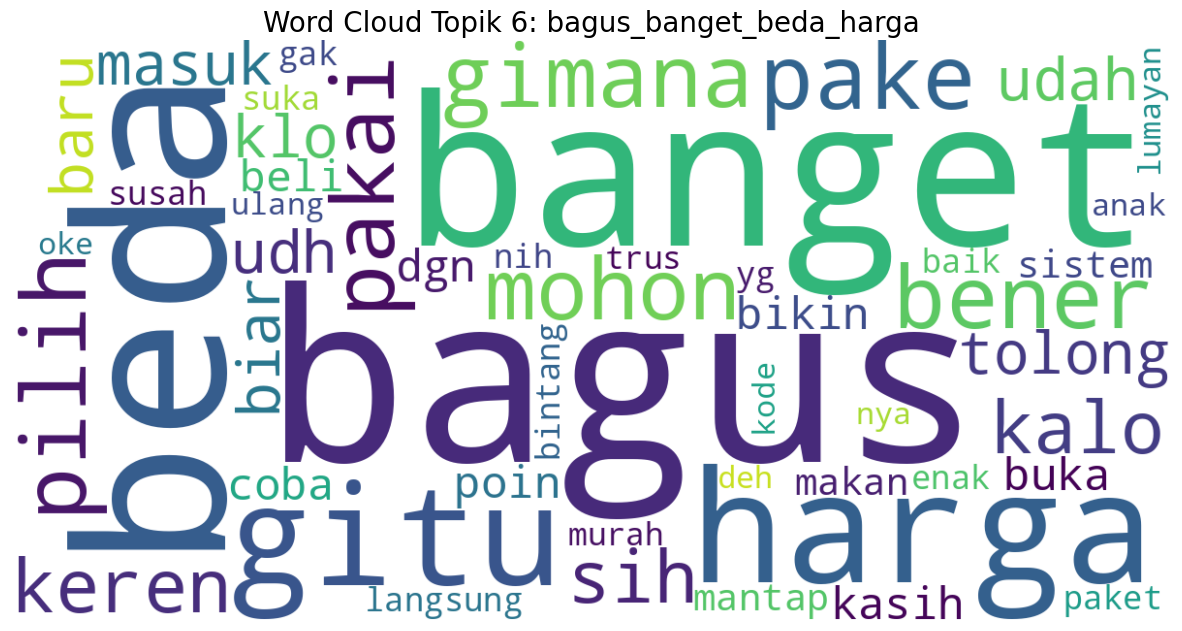


Proses selesai.
Semua Word Cloud telah disimpan di folder 'wordclouds_output_top2vec' dan jika berhasil, sudah diunduh secara otomatis.


In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from top2vec import Top2Vec
import warnings

# Coba import files dari google.colab untuk fitur download
try:
    from google.colab import files
    COLAB_ENV = True
except ImportError:
    COLAB_ENV = False
    print("Tidak berjalan di Google Colab. Fitur download otomatis tidak tersedia.")

# Mengabaikan peringatan DeprecationWarning dari SentenceTransformers
warnings.filterwarnings("ignore", category=DeprecationWarning)

# --- Konfigurasi Dasar ---
file_path = '/kaggle/input/datasetku/review_McD_preprocessed.xlsx'
column_name_with_reviews = 'content_stemmed'
chosen_embedding_model = "universal-sentence-encoder" # Atau model lain yang kamu inginkan
num_wordclouds_to_show = 7
output_dir = 'wordclouds_output_top2vec'

# --- Persiapan Data ---
if not os.path.exists(file_path):
    print(f"ERROR: File '{file_path}' tidak ditemukan.")
    exit()

df = pd.read_excel(file_path)

if column_name_with_reviews not in df.columns:
    print(f"ERROR: Kolom '{column_name_with_reviews}' tidak ditemukan.")
    exit()

docs = df[column_name_with_reviews].tolist()
docs = [str(doc) for doc in docs if pd.notna(doc) and str(doc).strip() != '']

if not docs:
    print("ERROR: Tidak ada ulasan valid yang ditemukan.")
    exit()

# --- Pelatihan Model Top2Vec ---
print("Melatih model Top2Vec...")
try:
    print(f"Menggunakan model embedding: {chosen_embedding_model}")
    model = Top2Vec(documents=docs, embedding_model=chosen_embedding_model, workers=-1)
    print("Model Top2Vec berhasil dilatih.")
except Exception as e:
    print(f"ERROR: Terjadi kesalahan saat melatih model Top2Vec: {e}")
    print("Pastikan koneksi internet stabil dan memori cukup, atau coba model embedding lain.")
    exit()

# --- Mendapatkan Informasi Topik ---
num_topics = model.get_num_topics()
print(f"\nMenemukan {num_topics} topik.")

topic_sizes, topic_ids = model.get_topic_sizes()
all_topic_words, all_word_scores, _ = model.get_topics() 

topic_info_list = []
for topic_id, size in zip(topic_ids, topic_sizes):
    if 0 <= topic_id < len(all_topic_words): 
        topic_name = "_".join(all_topic_words[topic_id][:4])
        topic_info_list.append({
            "Topic": topic_id,
            "Count": size,
            "Name": topic_name
        })
topic_info = pd.DataFrame(topic_info_list)
print("\nInformasi Topik:")
print(topic_info.sort_values(by='Count', ascending=False))

# --- Membuat dan Menyimpan Word Cloud ---
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"\nDirektori '{output_dir}' dibuat untuk menyimpan Word Cloud.")

identified_topics_to_show = topic_info.sort_values(by='Count', ascending=False).head(num_wordclouds_to_show)

if identified_topics_to_show.empty:
    print("Tidak ada topik untuk ditampilkan Word Cloud.")
else:
    print(f"Menghasilkan {num_wordclouds_to_show} Word Cloud teratas...")
    for _, row in identified_topics_to_show.iterrows():
        topic_id = row['Topic']
        topic_name = row['Name']
        
        if 0 <= topic_id < len(all_topic_words) and 0 <= topic_id < len(all_word_scores):
            words = all_topic_words[topic_id][:50]
            word_scores = all_word_scores[topic_id][:50]

            word_freq = {word: score for word, score in zip(words, word_scores)}
            
            if word_freq:
                wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate_from_frequencies(word_freq)

                plt.figure(figsize=(15, 8))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.title(f'Word Cloud Topik {topic_id}: {topic_name}', fontsize=20)

                clean_topic_name = "".join([c if c.isalnum() else "_" for c in topic_name])[:50]
                file_name = f'wordcloud_topic_{topic_id}_{clean_topic_name}.png'
                save_path = os.path.join(output_dir, file_name)
                
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
                print(f"Word Cloud untuk Topik {topic_id} disimpan di: {save_path}")
                
                # --- Bagian untuk membuat file dapat diunduh ---
                if COLAB_ENV:
                    try:
                        files.download(save_path)
                        print(f"'{file_name}' siap diunduh.")
                    except Exception as download_e:
                        print(f"Gagal menginisiasi download untuk '{file_name}': {download_e}")
                
                plt.show() # Tampilkan gambar di output sel
            else:
                print(f"Tidak ada kata kunci untuk Topik {topic_id}.")
        else:
            print(f"Peringatan: Topik ID {topic_id} tidak valid atau di luar rentang kata kunci yang ditemukan.")

print("\nProses selesai.")
if COLAB_ENV:
    print(f"Semua Word Cloud telah disimpan di folder '{output_dir}' dan jika berhasil, sudah diunduh secara otomatis.")
else:
    print(f"Semua Word Cloud telah disimpan di folder '{output_dir}'. Anda bisa mengunduhnya secara manual dari sana.")

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from top2vec import Top2Vec

# --- 1. KONFIGURASI ---
# Ganti dengan path file Anda
FILE_PATH = '/kaggle/input/datasetku/review_McD_preprocessed.xlsx' 
# Nama kolom yang berisi teks ulasan
COLUMN_NAME = 'content_stemmed'          
# Jumlah topik teratas yang ingin divisualisasi
TOP_N_TOPICS = 5

# --- 2. PERSIAPAN DATA ---
print(f"Membaca data dari '{FILE_PATH}'...")
try:
    df = pd.read_excel(FILE_PATH)
    # Ambil teks, pastikan tidak ada data kosong/null
    docs = df[COLUMN_NAME].dropna().astype(str).tolist()
    if not docs:
        raise ValueError("Tidak ada dokumen valid di kolom yang ditentukan.")
    print(f"Data berhasil dimuat: {len(docs)} dokumen.")
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di '{FILE_PATH}'")
    exit()
except (KeyError, ValueError) as e:
    print(f"ERROR: {e}")
    exit()

# --- 3. LATIH MODEL TOP2VEC ---
print("\nMelatih model Top2Vec... (Ini mungkin butuh beberapa saat)")
# workers=-1 akan menggunakan semua core CPU untuk mempercepat proses
try:
    model = Top2Vec(documents=docs, workers=-1, embedding_model='universal-sentence-encoder')
    print("Model berhasil dilatih.")
except Exception as e:
    print(f"ERROR saat melatih model: {e}")
    exit()

# --- 4. DAPATKAN INFORMASI TOPIK ---
print("\nMengambil informasi topik dari model...")
# Ambil SEMUA kata kunci dan skornya SEKALI di awal
# Ini adalah perbaikan utama untuk error sebelumnya
try:
    topic_words_list, word_scores_list, topic_nums_list = model.get_topics()
except Exception as e:
    print(f"Gagal mendapatkan topik dari model, mungkin model tidak berhasil dilatih. Error: {e}")
    exit()
    
# Dapatkan ukuran topik untuk menemukan yang paling populer
topic_sizes, topic_ids = model.get_topic_sizes()

# Buat DataFrame untuk menampilkan info topik paling populer
topic_info = pd.DataFrame({
    'Topic_ID': topic_ids,
    'Jumlah_Dokumen': topic_sizes
}).sort_values(by='Jumlah_Dokumen', ascending=False)

print("\nTopik Paling Populer:")
print(topic_info.head(TOP_N_TOPICS))


# --- 5. BUAT VISUALISASI (WORD CLOUD & BARCHART) ---
print(f"\n--- Membuat visualisasi untuk {TOP_N_TOPICS} topik teratas ---")

# Buat direktori output jika belum ada
if not os.path.exists('visualisasi_topik'):
    os.makedirs('visualisasi_topik')
    
# Loop melalui topik paling populer
for topic_id in topic_info.head(TOP_N_TOPICS)['Topic_ID']:
    
    # Ambil kata dan skor untuk topik ini dari list yang sudah kita dapatkan
    words = topic_words_list[topic_id]
    scores = word_scores_list[topic_id]
    topic_name = "_".join(words[:4]) # Nama topik dari 4 kata pertama

    print(f"\nMembuat visualisasi untuk Topik #{topic_id}: {topic_name}")
    
    # --- WORD CLOUD ---
    word_frequencies = dict(zip(words, scores))
    wc = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_frequencies)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud Topik #{topic_id}: {topic_name}')
    plt.savefig(f'visualisasi_topik/wordcloud_topic_{topic_id}.png', bbox_inches='tight')
    plt.show()
    print(f"-> Wordcloud untuk Topik #{topic_id} disimpan.")
    
    # --- BARCHART ---
    num_words_in_barchart = 10 # Tampilkan 10 kata teratas di barchart
    top_words = words[:num_words_in_barchart]
    top_scores = scores[:num_words_in_barchart]
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_scores, color='c')
    plt.gca().invert_yaxis() # Balik urutan agar kata teratas ada di paling atas
    plt.title(f'Top {num_words_in_barchart} Kata untuk Topik #{topic_id}')
    plt.xlabel('Skor Relevansi')
    plt.tight_layout()
    plt.savefig(f'visualisasi_topik/barchart_topic_{topic_id}.png', bbox_inches='tight')
    plt.show()
    print(f"-> Barchart untuk Topik #{topic_id} disimpan.")

print("\n--- Proses Selesai ---")

Membaca data dari '/kaggle/input/datasetku/review_McD_preprocessed.xlsx'...


2025-06-21 13:32:36,079 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-06-21 13:32:36,264 - top2vec - INFO - Downloading universal-sentence-encoder model


Data berhasil dimuat: 8965 dokumen.

Melatih model Top2Vec... (Ini mungkin butuh beberapa saat)
